In [1]:
import IPython
import numpy as np

In [2]:
sample_rate = 44100
IPython.display.Audio(np.sin(2*np.pi*220*np.arange(sample_rate)/sample_rate), rate=sample_rate)

In [3]:
def run_bytebeat(f):
    length = 2**16
    return f(np.arange(length, dtype=int)).astype(np.uint8)

In [4]:
def play_bytebeat(f):
    data = run_bytebeat(f).astype(float) / 255 * 2 - 1
    return IPython.display.Audio(data, rate=8000)

In [5]:
play_bytebeat(lambda t: ((t >> 10) & 42) * t)

In [6]:
from difflogic import LogicLayer, GroupSum, CompiledLogicNet
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from utils import UnaryInput, BinaryInput, BinaryOutput, train, plot_model

In [108]:
class BytebeatNet(nn.Module): 
    def __init__(self): 
        super().__init__()
        self.model = nn.Sequential(
            #UnaryInput(2**16-1),
            #LogicLayer(2**16-1, 2**15),
            UnaryInput(2**14-1),
            LogicLayer(2**14-1, 2**13),
            *[LogicLayer(2**n, 2**(n-1)) for n in range(13, 8, -1)],
            LogicLayer(256, 255),
            GroupSum(1),
            nn.Flatten(0),
        )

    def forward(self, X):
        return self.model(X)

In [629]:
device = "cpu" # "cuda"
outputs = torch.Tensor(run_bytebeat(lambda t: ((t >> 10) & 42) * t), device=device).to(float)
inputs = torch.arange(outputs.shape[0], dtype=float, device=device)
dataset = torch.utils.data.TensorDataset(inputs, outputs)
dataloader = DataLoader(dataset, batch_size=256)

In [112]:
model = BytebeatNet().to(device)
loss_fn = nn.MSELoss() # NOTE: very naïve choice of loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [113]:
sum(p.nelement() for p in model.parameters())

262128

In [114]:
i = 0

In [129]:
for _ in range(100):
    print(f"{i: 3}: ", end='')
    train(dataloader, model, loss_fn, optimizer)
    i += 1

 21: loss: 5.661289  [  256/16384]
loss: 5.523388  [  512/16384]
loss: 5.667434  [  768/16384]
loss: 9.238840  [ 1024/16384]
loss: 27.131425  [ 1280/16384]
loss: 67.142880  [ 1536/16384]
loss: 165.358297  [ 1792/16384]
loss: 1118.818445  [ 2048/16384]
loss: 6078.167296  [ 2304/16384]
loss: 5145.588442  [ 2560/16384]
loss: 5326.872037  [ 2816/16384]
loss: 5481.088773  [ 3072/16384]
loss: 5482.072338  [ 3328/16384]
loss: 5463.403970  [ 3584/16384]
loss: 5907.353280  [ 3840/16384]
loss: 7715.713474  [ 4096/16384]
loss: 2265.731775  [ 4352/16384]
loss: 451.393914  [ 4608/16384]
loss: 117.558223  [ 4864/16384]
loss: 50.143545  [ 5120/16384]
loss: 47.737500  [ 5376/16384]
loss: 53.523210  [ 5632/16384]
loss: 97.235363  [ 5888/16384]
loss: 1334.771773  [ 6144/16384]
loss: 6759.899388  [ 6400/16384]
loss: 5050.448139  [ 6656/16384]
loss: 5274.700945  [ 6912/16384]
loss: 5442.104000  [ 7168/16384]
loss: 5369.797232  [ 7424/16384]
loss: 5457.850031  [ 7680/16384]
loss: 5460.051207  [ 7936/16384]

KeyboardInterrupt: 

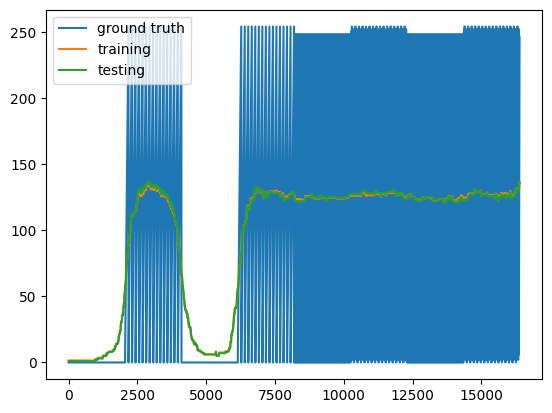

In [131]:
plot_model(model, inputs, outputs)

In [126]:
model.eval()
test_output = model(inputs).detach()

In [127]:
data = test_output.numpy().astype(float) / 255 * 2 - 1
IPython.display.Audio(data, rate=8000)

In [8]:
class BinaryBytebeatNet(nn.Module): 
    def __init__(self): 
        super().__init__()
        self.model = nn.Sequential(
            BinaryInput(16),
            LogicLayer(16, 32),
            LogicLayer(32, 32),
            LogicLayer(32, 32),
            LogicLayer(32, 32),
            LogicLayer(32, 32),
            LogicLayer(32, 32),
            LogicLayer(32, 16),
            LogicLayer(16, 8),
            BinaryOutput(8),
        )

    def forward(self, X):
        return self.model(X)

In [630]:
model = BinaryBytebeatNet().to(device)
loss_fn = nn.MSELoss() # NOTE: very naïve choice of loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
dataloader = DataLoader(dataset, batch_size=2048, shuffle=True)
i = 0

In [634]:
for _ in range(100):
    print(f"{i: 3}: ", end='')
    train(dataloader, model, loss_fn, optimizer)
    i += 1

 100: loss: 2133.709081  [ 2048/65536]
loss: 2159.745268  [ 4096/65536]
loss: 2179.376168  [ 6144/65536]
loss: 2134.163198  [ 8192/65536]
loss: 2170.916134  [10240/65536]
loss: 2136.372961  [12288/65536]
loss: 2170.650557  [14336/65536]
loss: 2225.669788  [16384/65536]
loss: 2154.189636  [18432/65536]
loss: 2082.200644  [20480/65536]
loss: 2236.411603  [22528/65536]
loss: 2159.261441  [24576/65536]
loss: 2178.904398  [26624/65536]
loss: 2121.002599  [28672/65536]
loss: 2089.764366  [30720/65536]
loss: 2180.239322  [32768/65536]
loss: 2062.717870  [34816/65536]
loss: 2197.980558  [36864/65536]
loss: 2119.205477  [38912/65536]
loss: 2237.250517  [40960/65536]
loss: 2176.907430  [43008/65536]
loss: 2107.481444  [45056/65536]
loss: 2096.524804  [47104/65536]
loss: 2191.071238  [49152/65536]
loss: 2210.433751  [51200/65536]
loss: 2055.986415  [53248/65536]
loss: 2103.208640  [55296/65536]
loss: 2189.571915  [57344/65536]
loss: 2019.047749  [59392/65536]
loss: 2040.803649  [61440/65536]
loss

Real-valued network loss: 2069.4396369383935
Discrete network loss:    4462.828125


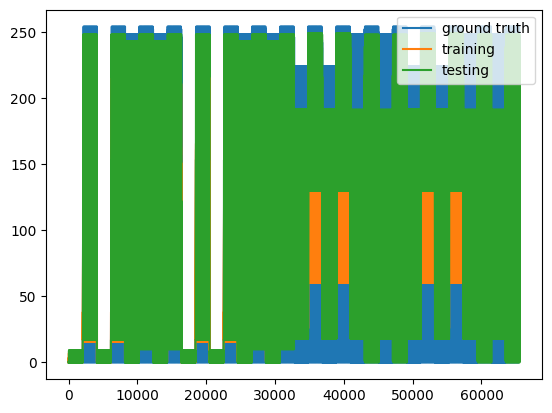

In [635]:
plot_model(model, inputs, outputs, loss_fn)

In [636]:
model.eval()
test_output = model(inputs).detach()
data = test_output.numpy().astype(float) / 255 * 2 - 1
IPython.display.Audio(data, rate=8000)

In [637]:
torch.save(model, "models/42_binary_mse_16bit.pkl")

In [235]:
import graph

In [236]:
ng = graph.make_graph(model)

In [621]:
#graph.draw_network(ng)

In [340]:
model_bits = 0
for layer in model.model:
    if not isinstance(layer, LogicLayer): continue
    print(layer)
    op_bits = layer.out_dim * 4
    connection_bits = np.log2(layer.in_dim) * layer.out_dim * 2
    print("bits for gate ops:", op_bits)
    print("bits for connections:", connection_bits)
    model_bits += op_bits + connection_bits
print(f"total information: {model_bits} bits")

LogicLayer(14, 32, eval)
bits for gate ops: 128
bits for connections: 243.67071501168667
LogicLayer(32, 32, eval)
bits for gate ops: 128
bits for connections: 320.0
LogicLayer(32, 32, eval)
bits for gate ops: 128
bits for connections: 320.0
LogicLayer(32, 32, eval)
bits for gate ops: 128
bits for connections: 320.0
LogicLayer(32, 32, eval)
bits for gate ops: 128
bits for connections: 320.0
LogicLayer(32, 32, eval)
bits for gate ops: 128
bits for connections: 320.0
LogicLayer(32, 16, eval)
bits for gate ops: 64
bits for connections: 160.0
LogicLayer(16, 8, eval)
bits for gate ops: 32
bits for connections: 64.0
total information: 2931.6707150116868 bits


In [356]:
num_samples = 2**14
sample_width = 8
output_bits = num_samples * sample_width
print(f"information in generated output: {output_bits} bits")
print(f"information ratio (compression factor):", output_bits / model_bits)
print(f"model-to-output size: {model_bits / output_bits * 100:.2f}%")

information in generated output: 131072 bits
information ratio (compression factor): 44.70897748810698
model-to-output size: 2.24%


In [383]:
from assembled_model import AssembledLogicNet, ALL_OPERATIONS, OPERATION_CODE
from IPython.display import HTML

In [638]:
layers = []
for layer in model.model:
    if not isinstance(layer, LogicLayer): continue
    layers.append([])
    for a, b, op in zip(layer.indices[0], layer.indices[1], layer.weights.argmax(1)):
        op = ALL_OPERATIONS[op]
        layers[-1].append([op, a.item(), b.item()])
    print(layers[-1])

[['not_a', 2, 9], ['not_and', 6, 4], ['zero', 8, 14], ['b', 14, 11], ['zero', 0, 1], ['a', 15, 13], ['not_a', 6, 8], ['b', 10, 11], ['b', 7, 6], ['not_a', 6, 3], ['not_b', 10, 3], ['not_b', 14, 5], ['one', 3, 9], ['and', 11, 2], ['not_a', 5, 7], ['one', 9, 7], ['b', 7, 15], ['not_b', 9, 13], ['not_and', 1, 1], ['not_a', 5, 12], ['xor', 2, 4], ['one', 0, 8], ['a', 3, 0], ['not_b', 4, 4], ['not_b', 15, 8], ['a', 11, 5], ['a', 15, 0], ['one', 14, 12], ['not_a', 2, 12], ['a', 13, 10], ['a', 13, 1], ['one', 10, 12]]
[['not_and', 9, 29], ['not_b', 1, 26], ['b', 4, 22], ['b', 31, 10], ['implied_by', 13, 26], ['b', 17, 28], ['not_a', 29, 2], ['not_b', 18, 16], ['not_a', 3, 12], ['not_and', 15, 2], ['a', 18, 15], ['not_implied_by', 21, 1], ['not_a', 25, 8], ['b', 10, 5], ['b', 31, 16], ['or', 19, 19], ['b', 21, 9], ['implied_by', 30, 17], ['not_implied_by', 11, 27], ['and', 20, 14], ['one', 14, 6], ['a', 3, 5], ['not_b', 7, 23], ['zero', 27, 0], ['a', 22, 20], ['implies', 0, 7], ['not_a', 30, 4

In [639]:
import json
print(json.dumps(layers))

[[["not_a", 2, 9], ["not_and", 6, 4], ["zero", 8, 14], ["b", 14, 11], ["zero", 0, 1], ["a", 15, 13], ["not_a", 6, 8], ["b", 10, 11], ["b", 7, 6], ["not_a", 6, 3], ["not_b", 10, 3], ["not_b", 14, 5], ["one", 3, 9], ["and", 11, 2], ["not_a", 5, 7], ["one", 9, 7], ["b", 7, 15], ["not_b", 9, 13], ["not_and", 1, 1], ["not_a", 5, 12], ["xor", 2, 4], ["one", 0, 8], ["a", 3, 0], ["not_b", 4, 4], ["not_b", 15, 8], ["a", 11, 5], ["a", 15, 0], ["one", 14, 12], ["not_a", 2, 12], ["a", 13, 10], ["a", 13, 1], ["one", 10, 12]], [["not_and", 9, 29], ["not_b", 1, 26], ["b", 4, 22], ["b", 31, 10], ["implied_by", 13, 26], ["b", 17, 28], ["not_a", 29, 2], ["not_b", 18, 16], ["not_a", 3, 12], ["not_and", 15, 2], ["a", 18, 15], ["not_implied_by", 21, 1], ["not_a", 25, 8], ["b", 10, 5], ["b", 31, 16], ["or", 19, 19], ["b", 21, 9], ["implied_by", 30, 17], ["not_implied_by", 11, 27], ["and", 20, 14], ["one", 14, 6], ["a", 3, 5], ["not_b", 7, 23], ["zero", 27, 0], ["a", 22, 20], ["implies", 0, 7], ["not_a", 30,

In [438]:
display(HTML("""
<svg id="network"></svg>
<script>
function drawNetwork() {
""" + f"const network = {layers}"
"""
    const xSpacing = 130
    const ySpacing = 30
    const nodeWidth = 80
    const nodeHeight = 15
    const svg = document.getElementById("network")
    svg.setAttribute("height", 1000)
    svg.setAttribute("viewBox", "0 0 1000 1000")
    for (const [layerIndex, layer] of network.entries()) {
        for (const [index, [op, a, b]] of layer.entries()) {
                const x = layerIndex * xSpacing
                const y = index * ySpacing
                const rect = document.createElementNS("http://www.w3.org/2000/svg", "rect")
                rect.setAttribute("x", x)
                rect.setAttribute("y", y)
                rect.setAttribute("width", nodeWidth)
                rect.setAttribute("height", nodeHeight)
                rect.setAttribute("fill", "none")
                rect.setAttribute("stroke", "black")
                svg.appendChild(rect)
                const text = document.createElementNS("http://www.w3.org/2000/svg", "text")
                text.setAttribute("font-size", 10)
                text.setAttribute("x", x + 5)
                text.setAttribute("y", y + 12)
                text.textContent = op
                svg.appendChild(text)
                if (layerIndex > 0) {
                    const line = document.createElementNS("http://www.w3.org/2000/svg", "line")
                    line.setAttribute("x1", x - xSpacing + nodeWidth)
                    line.setAttribute("y1", a * ySpacing + nodeHeight / 2)
                    line.setAttribute("x2", x)
                    line.setAttribute("y2", y + nodeHeight / 2)
                    line.setAttribute("stroke", "black")
                    svg.appendChild(line)
                }
        }
    }
}
drawNetwork()
</script>
"""))

In [442]:
import aleatora as alt

In [476]:
@alt.stream
def model_player():
    i = 0
    model.eval()
    while True:
        yield model(torch.Tensor([i]))[0].item() / 255 * 2 - 1
        i = (i + 1) % (2**14)

In [610]:
alt.play(model_player().resample(8000 / 44100))

In [478]:
@alt.stream
def model_player():
    model.eval()
    while True:
        yield from model(inputs).numpy() / 255 * 2 - 1

In [594]:
alt.play(model_player().resample(8000 / 44100))

In [614]:
alt.play()

In [597]:
bkp = (model.model[1].indices[0].clone(), model.model[1].indices[1].clone())

In [613]:
# scramble inputs
model.model[1].indices[0][:] = model.model[1].indices[0][torch.randperm(model.model[1].indices[0].size()[0])]
model.model[1].indices[1][:] = model.model[1].indices[1][torch.randperm(model.model[1].indices[1].size()[0])]

In [615]:
# restore original inputs
model.model[1].indices[0][:] = bkp[0]
model.model[1].indices[1][:] = bkp[1]

In [578]:
CompiledLogicNet(model.model)

AssertionError: The last layer of the model must be GroupSum, but it is <class 'utils.BinaryOutput'> / BinaryOutput() instead.

In [10]:
from compiled_model import CompiledLogicNet as CustomizedCompiledLogicNet
print(CustomizedCompiledLogicNet(model.model, num_bits=32).get_c_code())

int inp[16];
int out[8];

void logic_gate_net() {
	const int v0 = ~inp[2];
	const int v1 = ~(inp[6] & inp[4]);
	const int v2 = 0;
	const int v3 = inp[11];
	const int v4 = 0;
	const int v5 = inp[15];
	const int v6 = ~inp[6];
	const int v7 = inp[11];
	const int v8 = inp[6];
	const int v9 = ~inp[6];
	const int v10 = ~inp[3];
	const int v11 = ~inp[5];
	const int v12 = ~0;
	const int v13 = inp[11] & inp[2];
	const int v14 = ~inp[5];
	const int v15 = ~0;
	const int v16 = inp[15];
	const int v17 = ~inp[13];
	const int v18 = ~(inp[1] & inp[1]);
	const int v19 = ~inp[5];
	const int v20 = inp[2] ^ inp[4];
	const int v21 = ~0;
	const int v22 = inp[3];
	const int v23 = ~inp[4];
	const int v24 = ~inp[8];
	const int v25 = inp[11];
	const int v26 = inp[15];
	const int v27 = ~0;
	const int v28 = ~inp[2];
	const int v29 = inp[13];
	const int v30 = inp[13];
	const int v31 = ~0;
	const int v32 = ~(v9 & v29);
	const int v33 = ~v26;
	const int v34 = v22;
	const int v35 = v10;
	const int v36 = ~v26 | v13;
	

In [620]:
model.eval()
model(torch.Tensor([0]))

tensor([32.], dtype=torch.float64)

In [9]:
model = torch.load("models/42_binary_mse_16bit.pkl")

In [20]:
import scipy
_, outputs = scipy.io.wavfile.read("hello-world.wav")

In [21]:
data = outputs / 255 * 2 - 1
IPython.display.Audio(data, rate=8000)

In [22]:
class BinaryBytebeatNet(nn.Module): 
    def __init__(self): 
        super().__init__()
        self.model = nn.Sequential(
            BinaryInput(14),
            LogicLayer(16, 32),
            LogicLayer(32, 32),
            LogicLayer(32, 32),
            LogicLayer(32, 32),
            LogicLayer(32, 32),
            LogicLayer(32, 32),
            LogicLayer(32, 16),
            LogicLayer(16, 8),
            BinaryOutput(8),
        )

    def forward(self, X):
        return self.model(X)

In [38]:
device = "cpu" # "cuda"
inputs = torch.arange(outputs.shape[0], dtype=float, device=device)
_, outputs = scipy.io.wavfile.read("hello-world.wav")
outputs = torch.from_numpy(outputs.astype(float))
dataset = torch.utils.data.TensorDataset(inputs, outputs)
dataloader = DataLoader(dataset, batch_size=256)

In [39]:
model = BinaryBytebeatNet().to(device)
loss_fn = nn.MSELoss() # NOTE: very naïve choice of loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
dataloader = DataLoader(dataset, batch_size=2048, shuffle=True)
i = 0

In [52]:
for _ in range(100):
    print(f"{i: 3}: ", end='')
    train(dataloader, model, loss_fn, optimizer)
    i += 1

 300: loss: 1063.047423  [ 2048/16009]
loss: 1157.687522  [ 4096/16009]
loss: 1201.406006  [ 6144/16009]
loss: 1106.258089  [ 8192/16009]
loss: 1115.345756  [10240/16009]
loss: 1171.905792  [12288/16009]
loss: 1179.772160  [14336/16009]
loss: 1045.989963  [13384/16009]
 301: loss: 1108.836126  [ 2048/16009]
loss: 1189.172852  [ 4096/16009]
loss: 1119.684097  [ 6144/16009]
loss: 1171.302587  [ 8192/16009]
loss: 1111.737166  [10240/16009]
loss: 1093.329106  [12288/16009]
loss: 1154.675505  [14336/16009]
loss: 1113.008359  [13384/16009]
 302: loss: 1180.667419  [ 2048/16009]
loss: 1171.551527  [ 4096/16009]
loss: 1131.338261  [ 6144/16009]
loss: 1126.094459  [ 8192/16009]
loss: 1122.570846  [10240/16009]
loss: 1124.180552  [12288/16009]
loss: 1086.960311  [14336/16009]
loss: 1119.192041  [13384/16009]
 303: loss: 1106.594883  [ 2048/16009]
loss: 1164.308585  [ 4096/16009]
loss: 1150.598256  [ 6144/16009]
loss: 1132.384794  [ 8192/16009]
loss: 1148.617006  [10240/16009]
loss: 1101.493288  

Real-valued network loss: 1125.6481746148079
Discrete network loss:    6301.2645386969825


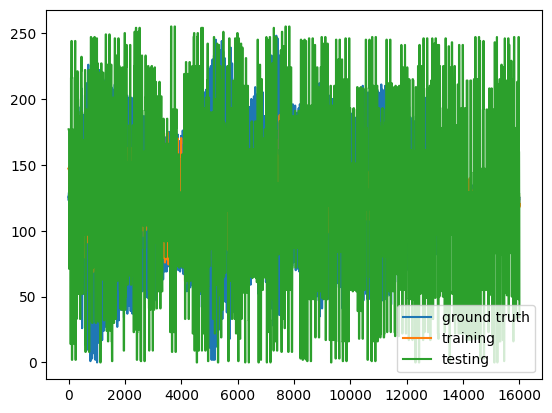

In [53]:
plot_model(model, inputs, outputs, loss_fn)

In [56]:
model.train()
test_output = model(inputs).detach()
data = test_output.numpy().astype(float) / 255 * 2 - 1
IPython.display.Audio(data, rate=8000)